In [1]:
from nltk.corpus import twitter_samples
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

In [2]:
# https://www.nltk.org/_modules/nltk/corpus/reader/twitter.html
#https://www.nltk.org/api/nltk.corpus.reader.html#nltk.corpus.reader.twitter.TwitterCorpusReader
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
positive_tweets = [tweet.lower() for tweet in positive_tweets]
negative_tweets = [tweet.lower() for tweet in negative_tweets]

In [3]:
def process_tweet(tweet, freqs):
    feature = [0, 0]
    for word in tweet.lower().split():
        if (word, 1) in freqs:
            feature[1]+=freqs[(word, 1)]
        if (word, 0) in freqs:
            feature[0]+=freqs[(word, 0)]
    return feature

In [4]:
def build_dataset(freqs):
    data = np.zeros([len(positive_tweets)+len(negative_tweets), 3])

    for i, tweet in enumerate(positive_tweets):
        feature = process_tweet(tweet, freqs)
        data[i, 0] = feature[0]
        data[i, 1] = feature[1]
        data[i, 2] = 1

    for i, tweet in enumerate(negative_tweets):
        feature = process_tweet(tweet, freqs)
        data[i+5000, 0] = feature[0]
        data[i+5000, 1] = feature[1]
        data[i+5000, 2] = 0

    Xs = data[:,0:2]
    ys = data[:,2]
    return Xs, ys

In [5]:
def create_frequency_table():
    freqs = {}
    index = 0
    all_tweets = [negative_tweets, positive_tweets]
    for tweet_list in all_tweets:

        for tweet in tweet_list:
            for word in tweet.split():
                if (word, index) in freqs.keys():
                    freqs[(word, index)]+=1
                else:
                    freqs[(word, index)]=1
        index+=1
                
    return freqs

In [6]:
freqs = create_frequency_table()
Xs, ys = build_dataset(freqs)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(Xs, ys, test_size=.2, random_state=1)

In [8]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9415

In [9]:
process_tweet("I", freqs)

[2184, 1064]

In [13]:
lr.predict(np.array(process_tweet("beautiful", freqs)).reshape(1,-1))

array([0.])

In [12]:
freqs[('beautiful', 1)]

39

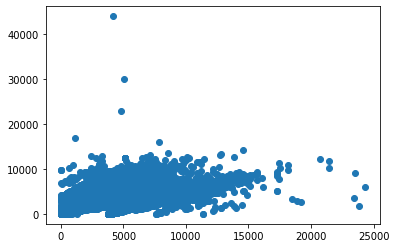

In [17]:
import matplotlib.pyplot as plt
plt.scatter(Xs[:,0], Xs[:, 1])